In [1]:
import sympy
sympy.init_printing()



In [16]:
g, G, M, c = sympy.symbols('g, G, M, c', positive=True)
t, x, r = sympy.symbols('t, x, r', positive=True)

coords = t, x, r

In [3]:
metric = sympy.Matrix([[-(1 - 2*G*M/ (r*c**2)), 0, 0], [0, (1 + 2* G* M/(r*c**2)), 0], [0, 0, (1 + 2* G* M/(r*c**2))]])

In [4]:
metric_up = metric.inv()

(0, 0, 0, 0)
(0, 0, 1, 0)
(0, 0, 2, G*M/(r*(-2*G*M + c**2*r)))
(0, 1, 0, 0)
(0, 1, 1, 0)
(0, 1, 2, 0)
(0, 2, 0, G*M/(r*(-2*G*M + c**2*r)))
(0, 2, 1, 0)
(0, 2, 2, 0)
(1, 0, 0, 0)
(1, 0, 1, 0)
(1, 0, 2, 0)
(1, 1, 0, 0)
(1, 1, 1, 0)
(1, 1, 2, -G*M/(r*(2*G*M + c**2*r)))
(1, 2, 0, 0)
(1, 2, 1, -G*M/(r*(2*G*M + c**2*r)))
(1, 2, 2, 0)
(2, 0, 0, G*M/(r*(2*G*M + c**2*r)))
(2, 0, 1, 0)
(2, 0, 2, 0)
(2, 1, 0, 0)
(2, 1, 1, G*M/(r*(2*G*M + c**2*r)))
(2, 1, 2, 0)
(2, 2, 0, 0)
(2, 2, 1, 0)
(2, 2, 2, -G*M/(r*(2*G*M + c**2*r)))


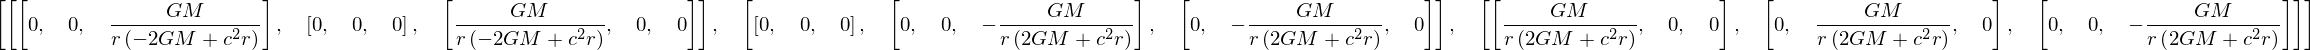

In [5]:
chris = []

for i in range(3):
    chris_i = []
    for j in range(3):
        chris_ij = []
        for k in range(3):
            chris_ijk = 0
            for l in range(3):
                chris_ijk += metric_up[i, l] * ( metric[l, k].diff(coords[j]) + \
                                                      metric[j, l].diff(coords[k]) - metric[j, k].diff(coords[l])) / 2
                
            print (i, j, k, chris_ijk.simplify())
            chris_ij.append(chris_ijk.simplify())
        chris_i.append(chris_ij)
    chris.append(chris_i)
chris

In [6]:
R, rp = sympy.symbols("R, r'")
rp

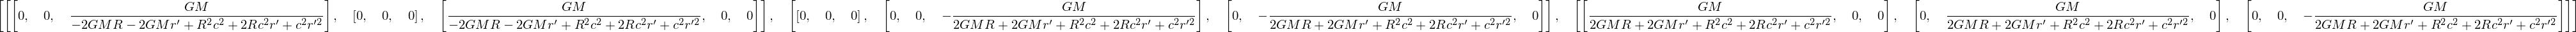

In [7]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            chris[i][j][k] = chris[i][j][k].subs([(r, R+rp)]).expand().simplify()
chris

In [8]:
rho, h, p = sympy.symbols('rho, h, p')
Tmunu=sympy.Matrix([[(p-rho*h)*metric_up[0,0],0,0],[0,p*metric_up[1,1],0],[0,0,p*metric_up[2,2]]])

In [ ]:
Tmur_Gamma = 0
Tnumu_Gamma = 0
for mu in range(3):
    for nu in range(3):
        Tmur_Gamma += Tmunu[mu,2]*chris[nu][mu][nu]
        Tnumu_Gamma += Tmunu[nu,mu]*chris[2][mu][nu]
        
P = sympy.Function('p')
Trr = Tmunu[2,2].subs([(p, P(r))])

hydrostatic_equil = sympy.Eq(sympy.diff(Trr,r) + (Tmur_Gamma + Tnumu_Gamma).subs([(p, P(r))]))

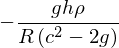

In [17]:
sympy.solve(hydrostatic_equil,sympy.diff(P(r),r))[0].subs([(G, g*R/M), (r,R+rp),(rp,0)]).simplify()